# Project: Wrangle And Analyze WeRateDogs Data

### By Himanshu Taneja

## Table of contents
 - [Introduction](#intro)
 - [Gathering data](#gather)
 - [Assessing data](#assess)
     - [Quality](#qual)
     - [Tidiness](#tidy)
 - [Cleaning data](#clean)
 - [Storing, Analyzing, and Visualizing](#store)
 - [Data Wrangling Efforts](#dae)
 - [Communicate Data Findings](#cdf)


<a id='intro'></a>
## Introduction
In this project on data wrangling, I have used data from WeRateDogs Twitter Account which rate dogs around the world and post interesting comments about dogs. The ratings are not standard, sometimes they even rate a dog 1000 out of 10. WeRateDogs have over 4 million followers on Twitter. <br>

As it is a real worl dataset, it is highly unlikely that this data will be clean. I have gathered data from various sources such as requests, APIs and manual download. Then it is assessed for quality and tidiness. Further, it has been cleaned and finally analyzed using visuals.

<a id='gather'></a>
## Gathering Data


In [2]:
# importing libraries
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import warnings
import tweepy
import os
import json
import datetime
import re
import seaborn as sns

%matplotlib inline

In [3]:
# Read local csv file
dogs = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
# Using requests module, download the image_predictions.tsv file

url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
dog_images = pd.read_csv('image_predictions.tsv', sep='\t')

In [8]:
dog_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
dog_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Gather the tweet information using Python's Tweepy module and store the information in a file.**

In [8]:
CONSUMER_KEY = ""
CONSUMER_SECRET = ""
OAUTH_TOKEN = ""
OAUTH_TOKEN_SECRET = ""

In [9]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth)

In [10]:
# Create an empty list of tweets
tweets_list = []

# And a list of the error tweets
errors_list = []

# For loop which will add each available tweet json to tweets_list
for tweet_id in dogs['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended',
                               wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count']
        retweets = tweet['retweet_count']
        date_time = tweet['created_at']
        
        tweets_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        errors_list.append(tweet_id)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

Rate limit reached. Sleeping for: 345


754011816964026368 _ [{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288 _ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 322


In [11]:
# Check the number of tweets recorded in the list.
len(tweets_list)

2331

In [12]:
# Convert the tweets_list into a dataframe and save it in an external file.
json_tweets = pd.DataFrame(tweets_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'date_time'])
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [10]:
# Read the tweets file
tweet_df = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [11]:
# Check for the tweets data
tweet_df.head()

,tweet_id,favorites,retweets,date_time
0,892420643555336193,36475,7753,2017-08-01 16:23:56+00:00
1,892177421306343426,31427,5749,2017-08-01 00:17:27+00:00
2,891815181378084864,23673,3802,2017-07-31 00:18:03+00:00
3,891689557279858688,39789,7912,2017-07-30 15:58:51+00:00
4,891327558926688256,37984,8550,2017-07-29 16:00:24+00:00


In [12]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2331 non-null   int64 
 1   favorites  2331 non-null   int64 
 2   retweets   2331 non-null   int64 
 3   date_time  2331 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


<a id='assess'></a>
## Assessing Data


We will follow the assessment towards the two areas:
 - Quality
 - Tidiness
 
 
The main dimensions for checking the **quality** of a dataset are:
 - Completeness: Does the data have missing values?
 - Validity: Does the data make sense?
 - Accuracy: Is the data accurate? Are the datatypes correct for each column of interest?
 - Consistency: Is the data standardised throughout?
<br><br>

The main dimensions for checking the **tidiness** of a dataset are:
 - Each variable forms a column
 - Each observation forms a row
 - Each type of observational unit forms a table



**First we will perform visual assessment and then programmatic assessment, in order to find quality and tidiness issues in the data and we will document them in order to perform cleaning operations in the next section.**

In [13]:
dogs.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
551,804475857670639616,NaN,NaN,2016-12-02 00:02:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HE'S TRYING TO BE HIS OWN PERSON LET HIM GO 13...,NaN,NaN,NaN,https://twitter.com/bvuepd/status/804417859124...,13,10,None,None,None,None,None
1429,697596423848730625,NaN,NaN,2016-02-11 01:42:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper with a piece of pizza. Two of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697596423...,11,10,None,None,None,pupper,None
1482,693267061318012928,NaN,NaN,2016-01-30 02:58:42 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Oscar. He can wave. Friendly af. 12/10...,NaN,NaN,NaN,https://vine.co/v/i5n2irFUYWv,12,10,Oscar,None,None,None,None
1600,686007916130873345,NaN,NaN,2016-01-10 02:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper has a magical eye. 11/10 I can't s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686007916...,11,10,None,None,None,pupper,None
1891,674764817387900928,NaN,NaN,2015-12-10 01:37:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These two pups are masters of camouflage. Very...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674764817...,10,10,None,None,None,None,None
741,780496263422808064,NaN,NaN,2016-09-26 19:56:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bell. She likes holding...,7.424232e+17,4.196984e+09,2016-06-13 18:27:32 +0000,https://twitter.com/dog_rates/status/742423170...,12,10,Bell,None,None,None,None
1417,698549713696649216,NaN,NaN,2016-02-13 16:50:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Claude. He's trying to be seductive bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698549713...,9,10,Claude,None,None,None,None
1213,715220193576927233,NaN,NaN,2016-03-30 16:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nico. His selfie game is strong af. Ex...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715220193...,10,10,Nico,None,None,None,None
567,802239329049477120,NaN,NaN,2016-11-25 19:55:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Loki. He'll do your taxes for you. Can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/802239329...,12,10,Loki,None,None,None,puppo
1106,734787690684657664,NaN,NaN,2016-05-23 16:46:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog is more successful than I will ever b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/734787690...,13,10,None,None,None,None,None


In [14]:
dog_images.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
814,692568918515392513,https://pbs.twimg.com/media/CZx_wV2UMAArgsJ.jpg,2,golden_retriever,0.636845,True,Labrador_retriever,0.163362,True,Pekinese,0.045554,True
1593,798694562394996736,https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg,1,Chihuahua,0.615163,True,Pembroke,0.159509,True,basenji,0.084466,True
1320,756288534030475264,https://pbs.twimg.com/media/Cn7gaHrWIAAZJMt.jpg,3,conch,0.925621,False,French_bulldog,0.032492,True,tiger_cat,0.006679,False
481,675362609739206656,https://pbs.twimg.com/media/CV9etctWUAAl5Hp.jpg,1,Labrador_retriever,0.479008,True,ice_bear,0.218289,False,kuvasz,0.139911,True
1391,766793450729734144,https://pbs.twimg.com/media/CqQykxrWYAAlD8g.jpg,1,beagle,0.451697,True,basset,0.197513,True,bloodhound,0.072699,True
791,690690673629138944,https://pbs.twimg.com/media/CZXTgKkWwAA5UZJ.jpg,1,bath_towel,0.194532,False,radiator,0.127776,False,Maltese_dog,0.089625,True
64,667171260800061440,https://pbs.twimg.com/media/CUJEuRIXIAAPDLt.jpg,1,giant_schnauzer,0.841265,True,Lakeland_terrier,0.052744,True,Irish_water_spaniel,0.034402,True
1115,724983749226668032,https://pbs.twimg.com/media/Cg-o3w0WgAANXdv.jpg,1,golden_retriever,0.675750,True,Great_Pyrenees,0.095168,True,cocker_spaniel,0.076043,True
758,688789766343622656,https://pbs.twimg.com/media/CY8SocAWsAARuyh.jpg,1,American_Staffordshire_terrier,0.599660,True,Staffordshire_bullterrier,0.380976,True,bull_mastiff,0.003889,True
879,698549713696649216,https://pbs.twimg.com/media/CbG_QRJXEAALVWy.jpg,1,French_bulldog,0.998544,True,Boston_bull,0.001404,True,boxer,0.000023,True


In [15]:
tweet_df.sample(20)

,tweet_id,favorites,retweets,date_time
2322,666057090499244032,273,128,2015-11-16 00:55:59+00:00
399,822647212903690241,0,6545,2017-01-21 03:29:14+00:00
1830,675531475945709568,1168,372,2015-12-12 04:23:49+00:00
426,819588359383371776,9836,2036,2017-01-12 16:54:26+00:00
1824,675781562965868544,1608,459,2015-12-12 20:57:34+00:00
187,855138241867124737,0,43,2017-04-20 19:16:59+00:00
200,852311364735569921,32723,9764,2017-04-13 00:03:59+00:00
751,776819012571455488,0,14010,2016-09-16 16:24:19+00:00
11,889880896479866881,26326,4583,2017-07-25 16:11:53+00:00
2099,670374371102445568,734,261,2015-11-27 22:51:19+00:00


**Now we will do programmatic assessment to dive deeper into exploring our data for any issues.**

**1. Archived Tweets Data (dogs)**

In [16]:
dogs.info()
dogs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
sum(dogs.duplicated())

0

In [18]:
dogs.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
             ... 
Champ           1
Bayley          1
Olaf            1
Timofy          1
incredibly      1
Name: name, Length: 957, dtype: int64

In [19]:
dogs.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
dogs.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
dogs.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [64]:
dogs.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


**2. Image Predictions Data (dog_images)**

In [22]:
dog_images.info()
dog_images.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
dog_images.jpg_url.value_counts()

https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg    2
https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg    2
https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg    2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg    2
https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg    2
                                                  ..
https://pbs.twimg.com/media/CoeWSJcUIAAv3Bq.jpg    1
https://pbs.twimg.com/media/CdM2xRpXEAUsR4k.jpg    1
https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg    1
https://pbs.twimg.com/media/CZv13u5WYAA6wQe.jpg    1
https://pbs.twimg.com/media/C46UmzSVMAAqBug.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [24]:
# Checking how the images are being displayed with a random url
from IPython.display import Image 
Image(url = 'https://pbs.twimg.com/media/Cfh7j6CWQAAndTd.jpg ', height = 640, width = 640)

In [25]:
dog_images.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
four-poster             1
African_grey            1
hummingbird             1
fiddler_crab            1
sandbar                 1
Name: p1, Length: 378, dtype: int64

In [27]:
dog_images.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
sandal                  1
china_cabinet           1
sea_urchin              1
cannon                  1
Japanese_spaniel        1
Name: p2, Length: 405, dtype: int64

In [29]:
dog_images.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
bow                    1
affenpinscher          1
moped                  1
boathouse              1
wok                    1
Name: p3, Length: 408, dtype: int64

**3. Twitter Count and Timestamp (tweet_df)**

In [30]:
tweet_df.info()
tweet_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2331 non-null   int64 
 1   favorites  2331 non-null   int64 
 2   retweets   2331 non-null   int64 
 3   date_time  2331 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


,tweet_id,favorites,retweets
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,7621.398541,2725.520378
std,6.823170e+16,11823.182430,4609.643417
min,6.660209e+17,0.000000,1.000000
25%,6.782670e+17,1331.500000,550.500000
50%,7.182469e+17,3318.000000,1279.000000
75%,7.986692e+17,9350.500000,3165.500000
max,8.924206e+17,157615.000000,78462.000000


In [31]:
sum(tweet_df.tweet_id.duplicated())

0

In [32]:
tweet_df.favorites.mean()

7621.398541398541

In [33]:
tweet_df.retweets.mean()

2725.5203775203777

<a id='qual'></a>
### Quality Issues

**Archived Tweets Data (dogs)**
 - Incorrect DataTypes for the following columns: retweeted_status_timestamp, timestamp.
 - Missing data in the following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls.
 - Invalid values in following columns: rating_numerator, rating_denominator.
 - Invalid names for dogs present in name column.
 - Incorrect values in rating numerators.
 - Rating Denominator is not standardised.
 - Source column is difficult to interpret.
 
**Image Predictions Data (dog_images)**
 - p1, p2, p3 columns have invalid data.
 - We have duplicate values for image urls for some entries.
 - Missing values in the image data as compared to archive data.
 
**Twitter Count and Timestamp (tweet_df)**
 - Missing data for few entries.
 - Date_Time column has unnecessary data in the end
 
<br>

<a id='tidy'></a>
### Tidiness Issues
 - Dog life stages are in different columns: doggo, floofer, pupper, puppo.
 - Relatable information lies in different datasets which can be merged.

<a id='clean'></a>
## Cleaning Data

The final step in our data wrangling process is cleaning. <br>
Here we follow a three step process to clean the data:
 - Define
 - Code
 - Test

In [55]:
# First we copy the data to new dataframes.
dogs_clean = dogs.copy()
dog_images_clean = dog_images.copy()
tweet_df_clean = tweet_df.copy()

**Define** <br>
Merge the three datasets.

**Code**

In [56]:
# merge tweet_df_clean and dogs_clean
dogs_clean = dogs_clean.merge(tweet_df_clean,
                              left_on = 'tweet_id', right_on = 'tweet_id',
                              how = 'inner')

In [57]:
# merge dog_images_clean and dogs_clean
dogs_clean = dogs_clean.merge(dog_images_clean,
                              left_on = 'tweet_id', right_on = 'tweet_id',
                              how = 'inner')

**Test**

In [58]:
# Check for the merged dataset
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   int64  
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  doggo                       2059 

In [63]:
# Check how the new dataframe looks
dogs_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
589,780459368902959104,NaN,NaN,2016-09-26 17:29:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Bear. Don't worry, he's not a real bea...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/780459368...,...,1,Great_Dane,0.382491,True,German_shepherd,0.312026,True,bull_mastiff,0.033272,True
1879,669324657376567296,NaN,NaN,2015-11-25 01:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ralf. He's a miniature Buick DiCaprio. Ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669324657...,...,1,seashore,0.201659,False,Cardigan,0.131544,True,sandbar,0.101430,False
1910,668633411083464705,NaN,NaN,2015-11-23 03:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Churlie. He likes bagels. 10/10 https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668633411...,...,1,Pekinese,0.589011,True,Shih-Tzu,0.390987,True,Japanese_spaniel,0.003310,True
429,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,...,1,chow,0.835102,True,Pomeranian,0.040783,True,Eskimo_dog,0.021274,True
1189,697881462549430272,NaN,NaN,2016-02-11 20:34:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carter. He wakes up in the morning and...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697881462...,...,1,washbasin,0.176423,False,paper_towel,0.167462,False,toilet_tissue,0.098029,False


**Define** <br>
Correct the incorrect rating values by extracting the ratings from the text column.

**Code**

In [65]:
# Create a dataframe for numerators and denominators
ratings_num_den = dogs_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [60]:
# Replacing the numerator rating with correct values extracted above
dogs_clean['rating_numerator'] = ratings_num_den

**Test**

In [87]:
# Check if the values with decimal places are recorded now
dogs_clean.rating_numerator.value_counts()

12       448
10       418
11       396
13       257
9        151
8         95
7         52
14        35
6         32
5         32
3         19
4         16
2          9
1          5
0          2
11.26      1
44         1
1776       1
88         1
165        1
121        1
80         1
144        1
420        1
9.75       1
24         1
60         1
11.27      1
50         1
13.5       1
45         1
143        1
84         1
99         1
204        1
Name: rating_numerator, dtype: int64

**Define** <br>
Create a single column for the different life stages of dogs. And since we have multiple stages for some tweets, we need to concatinate these multiple values.

**Code**

In [66]:
# replace None and NaN with empty value for the four columns
dogs_clean.doggo.replace('None', '', inplace=True)
dogs_clean.doggo.replace(np.NaN, '', inplace=True)
dogs_clean.floofer.replace('None', '', inplace=True)
dogs_clean.floofer.replace(np.NaN, '', inplace=True)
dogs_clean.puppo.replace('None', '', inplace=True)
dogs_clean.puppo.replace(np.NaN, '', inplace=True)
dogs_clean.pupper.replace('None', '', inplace=True)
dogs_clean.pupper.replace(np.NaN, '', inplace=True)

In [68]:
# Merging the three columns into a single column
dogs_clean['stage'] = dogs_clean.doggo + dogs_clean.floofer + dogs_clean.pupper + dogs_clean.puppo
dogs_clean.loc[dogs_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
dogs_clean.loc[dogs_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
dogs_clean.loc[dogs_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [70]:
dogs_clean.stage.replace('','None', inplace = True)

In [72]:
# Drop the individual stage columns
dogs_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

**Test**

In [71]:
dogs_clean.stage.value_counts()

None              1741
pupper             210
doggo               65
puppo               23
doggo, pupper       11
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

**Define** <br>
Remove the redundant data from the dataset

**Code**

In [73]:
# Remove the retweets
dogs_clean = dogs_clean[np.isnan(dogs_clean.retweeted_status_id)]

In [74]:
# Remove columns that are not needed anymore including retweets and image numbers
dogs_clean.drop(['in_reply_to_status_id',
                 'in_reply_to_user_id',
                 'retweeted_status_id',
                 'retweeted_status_user_id',
                 'retweeted_status_timestamp',
                 'img_num',
                 'expanded_urls'], axis = 1, inplace = True)

In [75]:
# Drop the date_time column obtained during our data pull through twitter API as it is similar to the timestamp
dogs_clean.drop('date_time', axis = 1, inplace = True)

**Test**

In [76]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1987 non-null   int64  
 1   timestamp           1987 non-null   object 
 2   source              1987 non-null   object 
 3   text                1987 non-null   object 
 4   rating_numerator    1987 non-null   object 
 5   rating_denominator  1987 non-null   int64  
 6   name                1987 non-null   object 
 7   favorites           1987 non-null   int64  
 8   retweets            1987 non-null   int64  
 9   jpg_url             1987 non-null   object 
 10  p1                  1987 non-null   object 
 11  p1_conf             1987 non-null   float64
 12  p1_dog              1987 non-null   bool   
 13  p2                  1987 non-null   object 
 14  p2_conf             1987 non-null   float64
 15  p2_dog              1987 non-null   bool   
 16  p3    

**Revisit Assessment** <br>
Check for duplicate tweet_id in dataset.

In [77]:
sum(dogs_clean.tweet_id.duplicated())

0

**Code**

In [78]:
# drop duplicate tweet_id values
dogs_clean.drop_duplicates('tweet_id', keep = 'last', inplace = True)

In [79]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1987 non-null   int64  
 1   timestamp           1987 non-null   object 
 2   source              1987 non-null   object 
 3   text                1987 non-null   object 
 4   rating_numerator    1987 non-null   object 
 5   rating_denominator  1987 non-null   int64  
 6   name                1987 non-null   object 
 7   favorites           1987 non-null   int64  
 8   retweets            1987 non-null   int64  
 9   jpg_url             1987 non-null   object 
 10  p1                  1987 non-null   object 
 11  p1_conf             1987 non-null   float64
 12  p1_dog              1987 non-null   bool   
 13  p2                  1987 non-null   object 
 14  p2_conf             1987 non-null   float64
 15  p2_dog              1987 non-null   bool   
 16  p3    

**Define** <br>
Change the datatype of timestamp and remove the timezone from it.

**Code**

In [80]:
# Remove timezone from timestamp.
dogs_clean['timestamp'] = dogs_clean['timestamp'].apply(lambda x : x.split('+')[0])
dogs_clean['timestamp'] = pd.to_datetime(dogs_clean['timestamp'])

**Test**

In [81]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1987 non-null   int64         
 1   timestamp           1987 non-null   datetime64[ns]
 2   source              1987 non-null   object        
 3   text                1987 non-null   object        
 4   rating_numerator    1987 non-null   object        
 5   rating_denominator  1987 non-null   int64         
 6   name                1987 non-null   object        
 7   favorites           1987 non-null   int64         
 8   retweets            1987 non-null   int64         
 9   jpg_url             1987 non-null   object        
 10  p1                  1987 non-null   object        
 11  p1_conf             1987 non-null   float64       
 12  p1_dog              1987 non-null   bool          
 13  p2                  1987 non-null   object      

**Define** <br>
Clean the source column

**Code**

In [82]:
# Extract only important string from source column
dogs_clean['source'] = dogs_clean['source'].apply(lambda x:
                                                  re.findall(r'>(.*)<', x)[0])

**Test**

In [83]:
dogs_clean.source.value_counts()

Twitter for iPhone    1949
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

**Define** <br>
Create a rating column and remove the numerator and denominator columns.

**Code**

In [89]:
# Convert the rating_numerator into int
dogs_clean['rating_numerator'] = dogs_clean['rating_numerator'].astype(float)
# Create rating column
dogs_clean['rating'] = dogs_clean['rating_numerator']/dogs_clean['rating_denominator'] 

In [92]:
# Drop numerator and denominator
dogs_clean.drop(['rating_numerator', 'rating_denominator'], axis = 1, inplace = True)

**Test**

In [93]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   tweet_id   1987 non-null   int64         
 1   timestamp  1987 non-null   datetime64[ns]
 2   source     1987 non-null   object        
 3   text       1987 non-null   object        
 4   name       1987 non-null   object        
 5   favorites  1987 non-null   int64         
 6   retweets   1987 non-null   int64         
 7   jpg_url    1987 non-null   object        
 8   p1         1987 non-null   object        
 9   p1_conf    1987 non-null   float64       
 10  p1_dog     1987 non-null   bool          
 11  p2         1987 non-null   object        
 12  p2_conf    1987 non-null   float64       
 13  p2_dog     1987 non-null   bool          
 14  p3         1987 non-null   object        
 15  p3_conf    1987 non-null   float64       
 16  p3_dog     1987 non-null   bool          


In [94]:
dogs_clean.rating.value_counts()

1.200000      452
1.000000      420
1.100000      402
1.300000      257
0.900000      151
0.800000       95
0.700000       51
1.400000       35
0.500000       33
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
0.000000        2
1.127000        1
1.350000        1
3.428571        1
0.636364        1
0.818182        1
1.126000        1
0.975000        1
42.000000       1
177.600000      1
Name: rating, dtype: int64

**Define** <br>
Create single column for dog breed and single column for confidence level

**Code**

In [95]:
# Create empty list
breed = []
confidence_level = []

# Function to append the dog breed and confidence for the first true occurence of prediction amongst p1, p2, and p3
def pred(prediction):
    if prediction['p1_dog'] == True:
        breed.append(prediction['p1'])
        confidence_level.append(prediction['p1_conf'])
    elif prediction['p2_dog'] == True:
        breed.append(prediction['p2'])
        confidence_level.append(prediction['p2_conf'])
    elif prediction['p3_dog'] == True:
        breed.append(prediction['p3'])
        confidence_level.append(prediction['p3_conf'])
    else:
        breed.append('Not Available')
        confidence_level.append('Not Available')
        
# Calling the function
dogs_clean.apply(pred, axis = 1)

# Creating new columns
dogs_clean['breed'] = breed
dogs_clean['confidence_level'] = confidence_level

In [96]:
# Drop rows which do not have the breed information
dogs_clean = dogs_clean[dogs_clean['breed'] !="Not Available"]

In [97]:
# Delete the prediction variable p1, p2, p3 and their subsets as they are not required

dogs_clean.drop(['p1','p2','p3',
                 'p1_conf', 'p2_conf', 'p3_conf',
                 'p1_dog', 'p2_dog', 'p3_dog'], axis = 1, inplace = True)

**Test**

In [98]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 1 to 2058
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          1679 non-null   int64         
 1   timestamp         1679 non-null   datetime64[ns]
 2   source            1679 non-null   object        
 3   text              1679 non-null   object        
 4   name              1679 non-null   object        
 5   favorites         1679 non-null   int64         
 6   retweets          1679 non-null   int64         
 7   jpg_url           1679 non-null   object        
 8   stage             1679 non-null   object        
 9   rating            1679 non-null   float64       
 10  breed             1679 non-null   object        
 11  confidence_level  1679 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 170.5+ KB


In [100]:
dogs_clean.sample(5)

,tweet_id,timestamp,source,text,name,favorites,retweets,jpg_url,stage,rating,breed,confidence_level
613,776201521193218049,2016-09-14 23:30:38,Twitter for iPhone,This is O'Malley. That is how he sleeps. Doesn...,O,9827,2567,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,None,1.0,Rottweiler,0.502228
321,822859134160621569,2017-01-21 17:31:20,Twitter for iPhone,This is Hobbes. He was told he was going to th...,Hobbes,13518,2336,https://pbs.twimg.com/media/C2tiAzGXgAIFdqi.jpg,None,1.2,malinois,0.332897
1504,677644091929329666,2015-12-18 00:18:36,Twitter for iPhone,This is a dog swinging. I really enjoyed it so...,a,1849,795,https://pbs.twimg.com/ext_tw_video_thumb/67764...,None,1.1,Chihuahua,0.626236
1654,673705679337693185,2015-12-07 03:28:45,Twitter for iPhone,This is Dot. He found out you only pretended t...,Dot,1229,394,https://pbs.twimg.com/media/CVl7u00WcAAufzR.jpg,None,0.8,Shih-Tzu,0.165383
797,748977405889503236,2016-07-01 20:31:43,Twitter for iPhone,What jokester sent in a pic without a dog in i...,not,10871,3419,https://pbs.twimg.com/media/CmTm-XQXEAAEyN6.jpg,None,1.0,German_short-haired_pointer,0.742216


<a id='store'></a>
## Storing, Analyzing, and Visualizing

This section is dedicated to analysis of the cleaned data set using visuals to arrive at meanigful conclusions.

#### Storing the data

In [101]:
# Store the clean dataset to a csv file
dogs_clean.to_csv('twitter_archive_master.csv',
                  index = False, encoding = 'utf-8')

#### Analysis And Visualizations

In [102]:
# First we will analyze the most popular dog breeds
popular_dogs = dogs_clean.breed.value_counts()[:13]
popular_dogs

golden_retriever            158
Labrador_retriever          106
Pembroke                     95
Chihuahua                    91
pug                          62
toy_poodle                   50
chow                         48
Pomeranian                   42
Samoyed                      41
malamute                     33
Chesapeake_Bay_retriever     31
French_bulldog               30
cocker_spaniel               30
Name: breed, dtype: int64

Text(0, 0.5, 'Count')

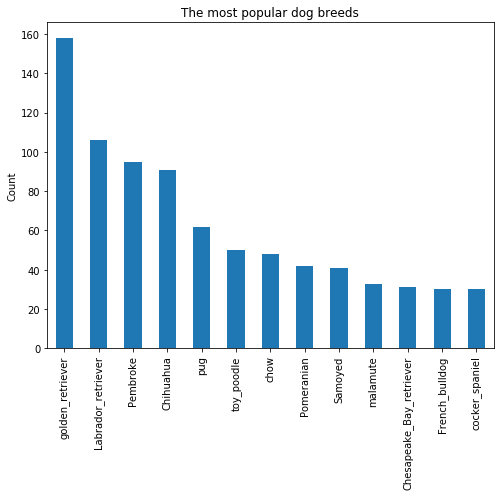

In [103]:
# Bar Plot
plt.figure(figsize = [8,6])
popular_dogs.plot(kind = 'bar')
plt.title('The most popular dog breeds')
plt.ylabel('Count')

The most popular dog breed in our data appears to be Golden Retriever

In [104]:
# Next we will check for the best rated dog category
best_rated = dogs_clean.groupby('breed').rating.mean()
best_rated.sort_values(ascending = False, inplace = True)
best_rated

breed
Bouvier_des_Flandres           1.300000
Saluki                         1.250000
briard                         1.233333
Tibetan_mastiff                1.225000
Border_terrier                 1.214286
                                 ...   
Tibetan_terrier                0.925000
Walker_hound                   0.900000
Scotch_terrier                 0.900000
soft-coated_wheaten_terrier    0.880000
Japanese_spaniel               0.500000
Name: rating, Length: 113, dtype: float64

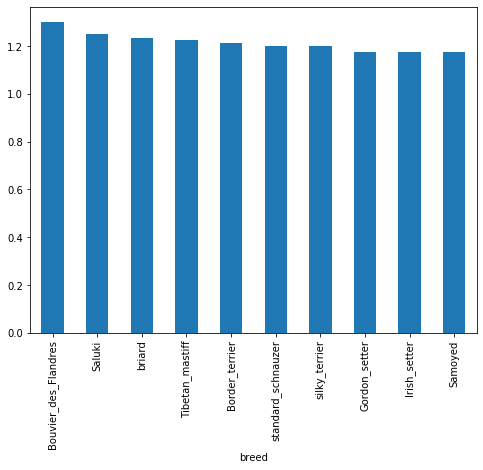

In [105]:
# Plot for the top best rated dogs
plt.figure(figsize = [8,6])
best_rated[:10].plot(kind = 'bar')

On an average, the breed Bouvier des Flanders has recieved the best average rating. But the average ratings of top dog breeds are pretty close.

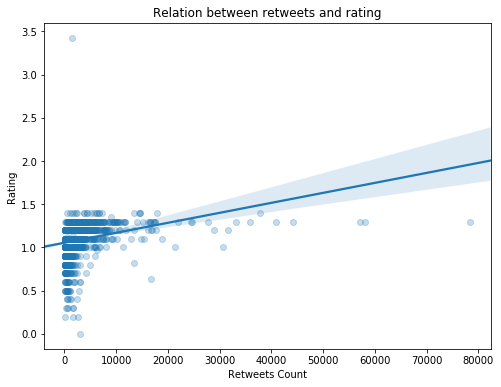

In [107]:
# Relation between number of retweets and rating
plt.figure(figsize = [8,6])
sns.regplot(data = dogs_clean, x = 'retweets', y = 'rating', x_jitter = 0.04,
           scatter_kws = {'alpha':1/4})
plt.title("Relation between retweets and rating")
plt.xlabel('Retweets Count')
plt.ylabel('Rating');

There appears to be a slight positive correlation between retweet count and rating of a dog.

In [110]:
# Finally we will analyze the number of tweets over time
monthly_tweets = dogs_clean.groupby(pd.Grouper(key = 'timestamp', freq = 'M')).count().reset_index()
monthly_tweets = monthly_tweets[['tweet_id','timestamp']]
monthly_tweets

,tweet_id,timestamp
0,226,2015-11-30
1,288,2015-12-31
2,141,2016-01-31
3,96,2016-02-29
4,107,2016-03-31
5,50,2016-04-30
6,48,2016-05-31
7,69,2016-06-30
8,77,2016-07-31
9,47,2016-08-31


In [111]:
monthly_tweets['timestamp'] = monthly_tweets['timestamp'].astype(str)

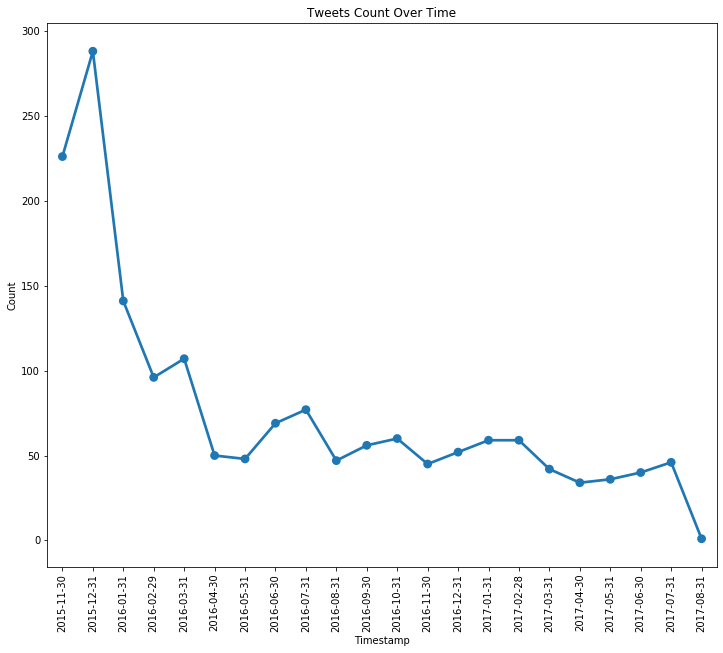

In [113]:
#Plotting the values
plt.figure(figsize = [12,10])
sns.pointplot(data = monthly_tweets, x = 'timestamp', y = 'tweet_id')
plt.xticks(rotation = 90)
plt.title('Tweets Count Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.savefig('tweets.png');

It appears the number of tweets have decreased over the years.